<a href="https://colab.research.google.com/github/yuki-koizumi/seeds-2021/blob/main/SEEDS_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリーの読み込み
機械学習やグラフ描画ライブラリーなど、必要なライブラリーを読み込みます。

In [ ]:
import sys

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

# 定数値の設定
後続のプログラムで動作を変化させる可能のある値については、以下の変数で定義しています。
必要に応じて、修正してください。

In [ ]:
epochs     = 10
num_neuron = 1024
num_layer  = 2
file_name  = "FIB1.csv"  # rename this variable if you want to use a different dataset
activation = "relu"

# データファイルのダウンロード

In [ ]:
!if [[ ! -e 'FIB1.csv' ]]; then wget 'https://www-hasegawa.ist.osaka-u.ac.jp/~ykoizumi/FIB1.csv'; fi

# 関数群の定義

In [ ]:
def normalize(x, axis=None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd = np.std(x, axis=axis, keepdims=True)
    zscore = (x - xmean) / xstd
    return xmean, xstd, zscore


def denormalize(xmean, xstd, zscore):
    x = zscore * xstd + xmean
    return x


# 学習
def train_model(x, y, model, epochs, batch_size):
    # early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    # history = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split = 0.1, verbose=1, callbacks=[early_stop])
    history = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split = 0.1, verbose=1)
    return model, history


# モデル作成
def build_model(num_neuron, num_layer, activation = "relu"):
    model = keras.Sequential()
    model.add(layers.Dense(num_neuron, input_shape=(1,), activation=activation))
    for i in range(num_layer - 1):
        model.add(layers.Dense(num_neuron, activation=activation))
    model.add(layers.Dense(1))

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model


def load_data(file_name):
    data = pd.read_csv(file_name).sort_values("IP")
    data = data[~data.duplicated(subset="IP")]
    data = data.reset_index()
    data["position"] = data.index.values
    return np.array(data["IP"]), np.array(data["position"])


def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    fig = plt.figure(figsize=(figure_width, figure_height))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(hist["epoch"], hist["mse"], label="Train Error")
    ax.plot(hist["epoch"], hist["val_mse"], label="Val Error")

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Mean Square Error [$y^2$]")

    ax.set_xlim(0,)
    ax.set_ylim(0,)

    plt.legend(
        bbox_to_anchor=(0, 1),
        loc="upper left",
        frameon=False,
        borderaxespad=0,
        labelspacing=0.1,
    )

    # fig.savefig("fig-history.pdf")
    return


def plot_result(x_orig, y_orig, y_pred):
    fig = plt.figure(figsize=(figure_width, figure_height))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(x_orig, y_orig, "b-", label="Original position")
    ax.plot(x_orig, y_pred, "r-", label="Learned index")

    ax.set_xlim(0,)
    ax.set_ylim(0,)
    ax.set_ylabel("Position")
    ax.set_xlabel("IP Prefix/IP Address")

    plt.legend(
        bbox_to_anchor=(0, 1),
        loc="upper left",
        frameon=False,
        borderaxespad=0,
        labelspacing=0.1,
    )

    # fig.savefig("fig-result.pdf")
    return


# データの読み込みと正規化
指定したファイルから、データを読み込んで必要な値を抽出します。さらに、機械学習で処理しやすいように、値を正規化します。

In [ ]:
# Load data
x_np, y_np = load_data(file_name)

# Normalization
xmean, xstd, norm_x = normalize(x_np)
ymean, ystd, norm_y = normalize(y_np)

# 機械学習モデルの構築
機械学習のモデルを構築します。モデルの構成を変更した場合は、ここと、続く「学習」のパートも再実行してください。

In [ ]:
# Build model
index = build_model(num_neuron=num_neuron, num_layer=num_layer, activation=activation)

# 学習
読み込んだデータを用いて、機械学習モデルを学習します。

In [ ]:
# Train model
index, history = train_model(norm_x, norm_y, index, epochs, 1024)

# Save weights and biases
index.save("weight-single-learned-index.h5")

# Load weights and biases
# index.load_weights("weight-single-learned-index.h5")

Epoch 1/10
198/198 [==============================] - 3s 10ms/step - loss: 0.0236 - mae: 0.1081 - mse: 0.0236 - val_loss: 0.0169 - val_mae: 0.1204 - val_mse: 0.0169
Epoch 2/10
198/198 [==============================] - 2s 8ms/step - loss: 0.0088 - mae: 0.0750 - mse: 0.0088 - val_loss: 0.0094 - val_mae: 0.0852 - val_mse: 0.0094
Epoch 3/10
198/198 [==============================] - 2s 9ms/step - loss: 0.0064 - mae: 0.0649 - mse: 0.0064 - val_loss: 0.0080 - val_mae: 0.0636 - val_mse: 0.0080
Epoch 4/10
198/198 [==============================] - 2s 8ms/step - loss: 0.0052 - mae: 0.0583 - mse: 0.0052 - val_loss: 0.0068 - val_mae: 0.0652 - val_mse: 0.0068
Epoch 5/10
198/198 [==============================] - 2s 8ms/step - loss: 0.0046 - mae: 0.0545 - mse: 0.0046 - val_loss: 0.0074 - val_mae: 0.0647 - val_mse: 0.0074
Epoch 6/10
198/198 [==============================] - 2s 8ms/step - loss: 0.0041 - mae: 0.0497 - mse: 0.0041 - val_loss: 0.0292 - val_mae: 0.1436 - val_mse: 0.0292
Epoch 7/10
198/

# 予測値の計算


In [ ]:
# Prediction result
y_pred = denormalize(ymean, ystd, index.predict(norm_x))

# 結果の描画

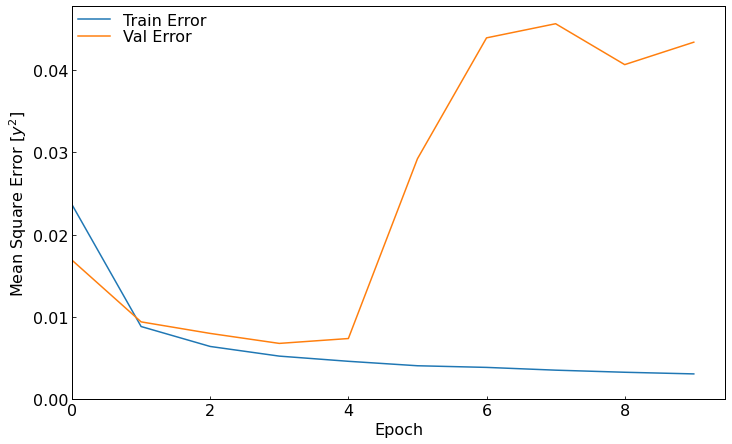

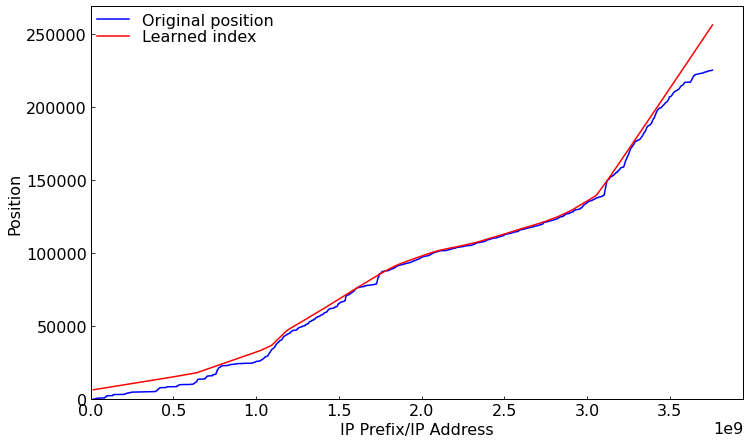

In [ ]:
figure_width                    = 11.7
figure_height                   = figure_width / ((1 + np.sqrt(5.0)) / 2.0)
marker_size                     = 10
line_width                      = 2
plt.rcParams["font.size"]       = 16
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["pdf.fonttype"]    = 42

plot_history(history)
plot_result(x_np, y_np, y_pred)